In [2]:
# The reference of the code below is hw5 programming assignment
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('data_drop_null.csv')
df1 = df.to_numpy()
X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)
weight_results = []
acc_train_results = []
acc_test_results = []

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [5]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train,Y_train)
X_train, Y_train = X_smote, Y_smote

In [6]:
def neural_network_logistic(X_train, Y_train, X_test, Y_test, alpha, learning_rate_init):
    clf = MLPClassifier(hidden_layer_sizes=(11,),random_state=1, activation="logistic", max_iter=3000, solver = 'sgd', alpha = alpha, learning_rate_init=learning_rate_init).fit(X_train, Y_train)

    Yhat_train =  clf.predict(X_train)
    acc_train =  clf.score(X_train, Y_train)
    acc_train_logistic.append(acc_train)
    
    Yhat_test = clf.predict(X_test)
    acc_test = clf.score(X_test, Y_test)
    acc_test_logistic.append(acc_test)
    weight_logistic.append(clf.coefs_)

In [7]:
lamb = [0.001,0.01,0.1,1,10,100]
learning_rate = [0.001,0.01,0.1,1,10,100]

In [8]:
acc_train_logistic = []
acc_test_logistic = []
weight_logistic = []
for l in lamb:
    for rate in learning_rate:
        neural_network_logistic(X_train, Y_train, X_test, Y_test, l, rate)

C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:160: RuntimeWarning: overflow encountered in multiply
  coef_grads[layer] += (self.alpha * self.coefs_[layer])
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_base.py:109: RuntimeWarning: invalid value encountered in multiply
  delta *= (1 - Z)
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings

In [9]:
def plot_acc(acc_test):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter([-3,-2,-1,0,1,2]*6,[-3]*6+[-2]*6+[-1]*6+[0]*6+[1]*6+[2]*6,acc_test)
    max_acc = max(acc_test)
    index = acc_test.index(max_acc)
    ax.set_title("Accuracy vs lambda and learning rate")
    ax.set_ylabel('log of learning rate')
    ax.set_xlabel('log of lambda')
    ax.set_zlabel('Accuracy')
    print("max accuracy is", max_acc)
    print("lambda:", lamb[index//6])
    print("learning_rate:", learning_rate[index%6])

max accuracy is 0.8627145085803433
lambda: 0.001
learning_rate: 10


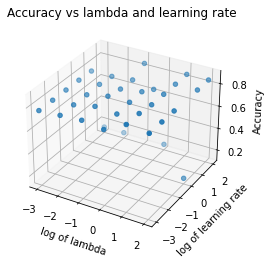

In [10]:
plot_acc(acc_test_logistic)

In [11]:
def neural_network_tanh(X_train, Y_train, X_test, Y_test, alpha, learning_rate_init):
    clf = MLPClassifier(hidden_layer_sizes=(11,),random_state=1, activation="tanh", max_iter=3000, solver = 'sgd', alpha = alpha, learning_rate_init=learning_rate_init).fit(X_train, Y_train)

    Yhat_train =  clf.predict(X_train)
    acc_train =  clf.score(X_train, Y_train)
    acc_train_tanh.append(acc_train)
    
    Yhat_test = clf.predict(X_test)
    acc_test = clf.score(X_test, Y_test)
    acc_test_tanh.append(acc_test)
    weight_tanh.append(clf.coefs_)

In [12]:
acc_train_tanh = []
acc_test_tanh = []
weight_tanh = []
for l in lamb:
    for rate in learning_rate:
        neural_network_tanh(X_train, Y_train, X_test, Y_test, l, rate)

C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:160: RuntimeWarning: overflow encountered in multiply
  coef_grads[layer] += (self.alpha * self.coefs_[layer])
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_base.py:127: RuntimeWarning: invalid value encountered in multiply
  delta *= (1 - Z ** 2)
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  war

max accuracy is 0.8575143005720229
lambda: 0.001
learning_rate: 1


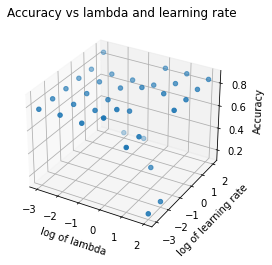

In [13]:
plot_acc(acc_test_tanh)

In [14]:
def neural_network_relu(X_train, Y_train, X_test, Y_test, alpha, learning_rate_init):
    clf = MLPClassifier(hidden_layer_sizes=(11,),random_state=1, activation="relu", max_iter=3000, solver = 'sgd', alpha = alpha, learning_rate_init=learning_rate_init).fit(X_train, Y_train)

    Yhat_train =  clf.predict(X_train)
    acc_train =  clf.score(X_train, Y_train)
    acc_train_relu.append(acc_train)
    
    Yhat_test = clf.predict(X_test)
    acc_test = clf.score(X_test, Y_test)
    acc_test_relu.append(acc_test)
    weight_relu.append(clf.coefs_)

In [15]:
acc_train_relu = []
acc_test_relu = []
weight_relu = []
for l in lamb:
    for rate in learning_rate:
        neural_network_relu(X_train, Y_train, X_test, Y_test, l, rate)

C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\extmath.py:152: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\sicon\AppData\Local\Programs\Python\Python38\lib\site-packages\skle

max accuracy is 0.8512740509620385
lambda: 0.001
learning_rate: 1


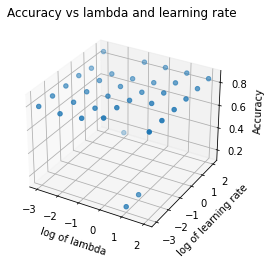

In [16]:
plot_acc(acc_test_relu)

In [17]:
acc_test_results = []
acc_test_results.append(acc_test_logistic)
acc_test_results.append(acc_test_tanh)
acc_test_results.append(acc_test_relu)
df_test = pd.DataFrame(np.array(acc_test_results).T, index = [str([l,r]) for l in lamb for r in learning_rate], columns=['neural_network(sigmoid)','neural_network(tanh)','neural_network(relu)'])
df_test.to_csv('acc_test_neural.csv')

In [18]:
acc_train_results = []
acc_train_results.append(acc_test_logistic)
acc_train_results.append(acc_train_tanh)
acc_train_results.append(acc_train_relu)
df_train = pd.DataFrame(np.array(acc_train_results).T, index = [str([l,r]) for l in lamb for r in learning_rate], columns=['neural_network(sigmoid)','neural_network(tanh)','neural_network(relu)'])
df_train.to_csv('acc_train_neural.csv')